In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Import the API key
from config import weather_api_key
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime


In [2]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

23.88615193432979 -146.8693370900928
63.73462761173397 -19.613334451060325
14.548032003502215 84.100998644919
-50.071922956501034 -134.4734841572432
51.1770737315463 -135.38616288783226
-7.028833913299508 71.10242651715177
-1.508516356249629 103.38310070851162
48.139722932570294 62.92028557850165
-33.833230024359665 -42.50058625678963
-41.67694699636649 27.132171228191567
42.87934273431702 64.8480420127016
-63.40687988715489 94.22887126631423
31.465906348763014 -76.41419201200006
-42.82757407125674 143.25113999204655
87.2790506310256 -118.0172044080736
51.27419274178732 -13.513814158035586
-40.51864016279321 172.70603427998765
47.39258764454601 21.398972039553342
-69.21550690383809 62.184292465746836
89.20906086808483 -163.85911960610974
87.6107507984508 -89.7854567140861
19.752859277057723 108.03842929100125
-24.15447077235352 28.986499044375876
-75.83227717213654 -18.842536280395137
30.56594416370278 74.4235960398234
20.57395751724532 -80.17870560430075
75.55611147757168 103.44630967

2.6677064885486033 37.790264090850826
-4.521863228298301 114.47204423823251
50.038290068279196 -52.87520951779551
11.809702150110695 166.74761185413035
-10.323338045352358 -124.11201206886987
-69.6096283988768 28.71762771999107
-49.856448283956134 -110.69823156534729
-4.16657952710402 97.65285935314807
42.39673690278295 95.65784638155753
82.99475626069159 61.41820489506259
-65.75641366376689 165.43604067408353
-14.088432065019163 -9.065297881112599
2.579634262321747 46.281749889537735
-24.14889003223874 -70.61889784742525
77.4227972941193 -125.31846194588535
-27.16559419185932 -15.59533877811225
43.52322013135773 34.467745287513736
-39.267336015948075 -44.10633838488886
77.20176197745027 -37.76051377508142
-20.89971326541368 -46.23869209443299
-49.829324162496626 4.772318959057287
0.9258002949996751 -127.32236042671386
67.89092438707954 -41.98327042141793
-21.529098177857918 38.00021018774842
34.54237492871819 -139.51023728666522
-21.832427522829718 -139.8956875091362
86.61275869471322

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify nearest city for each lat, lng combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i>= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")

    # Log the URL with each city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
#Indicate that Data loading is complete.
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | hvolsvollur
Processing Record 3 of Set 1 | yanam
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | ketchikan
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | jambi
Processing Record 8 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 9 of Set 1 | laguna
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | tasbuget
City not found. Skipping...
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | wilmington
Processing Record 14 of Set 1 | burnie
Processing Record 15 of Set 1 | tuktoyaktuk
Processing Record 16 of Set 1 | dingle
Processing Record 17 of Set 1 | takaka
Processing Record 18 of Set 1 | hajduszoboszlo
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | qaanaaq
P

Processing Record 35 of Set 4 | borogontsy
Processing Record 36 of Set 4 | alta gracia
Processing Record 37 of Set 4 | ewa beach
Processing Record 38 of Set 4 | zemio
Processing Record 39 of Set 4 | sar-e pul
Processing Record 40 of Set 4 | san quintin
Processing Record 41 of Set 4 | constitucion
Processing Record 42 of Set 4 | san marcos
Processing Record 43 of Set 4 | margate
Processing Record 44 of Set 4 | kawalu
Processing Record 45 of Set 4 | tahara
Processing Record 46 of Set 4 | alirajpur
Processing Record 47 of Set 4 | sao joao da barra
Processing Record 48 of Set 4 | nabire
Processing Record 49 of Set 4 | sitka
Processing Record 50 of Set 4 | vila do maio
Processing Record 1 of Set 5 | chaa-khol
City not found. Skipping...
Processing Record 2 of Set 5 | nova olimpia
Processing Record 3 of Set 5 | alta floresta
Processing Record 4 of Set 5 | arrecife
Processing Record 5 of Set 5 | acapulco
Processing Record 6 of Set 5 | rabo de peixe
Processing Record 7 of Set 5 | kaitangata
Pr

Processing Record 24 of Set 8 | mahebourg
Processing Record 25 of Set 8 | faanui
Processing Record 26 of Set 8 | coos bay
Processing Record 27 of Set 8 | davila
Processing Record 28 of Set 8 | nizhnyaya tavda
Processing Record 29 of Set 8 | ostersund
Processing Record 30 of Set 8 | havoysund
Processing Record 31 of Set 8 | tabou
Processing Record 32 of Set 8 | boke
Processing Record 33 of Set 8 | krasnaya gora
Processing Record 34 of Set 8 | norman wells
Processing Record 35 of Set 8 | keti bandar
Processing Record 36 of Set 8 | nuuk
Processing Record 37 of Set 8 | bintulu
Processing Record 38 of Set 8 | fernie
Processing Record 39 of Set 8 | hameenlinna
Processing Record 40 of Set 8 | nardaran
Processing Record 41 of Set 8 | baglung
Processing Record 42 of Set 8 | mendi
Processing Record 43 of Set 8 | lipin bor
Processing Record 44 of Set 8 | dzaoudzi
Processing Record 45 of Set 8 | sao filipe
Processing Record 46 of Set 8 | kaka
Processing Record 47 of Set 8 | berberati
Processing Re

Processing Record 10 of Set 12 | seoul
Processing Record 11 of Set 12 | galle
Processing Record 12 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 13 of Set 12 | tobol
Processing Record 14 of Set 12 | san juan
Processing Record 15 of Set 12 | maningrida
Processing Record 16 of Set 12 | taksimo
Processing Record 17 of Set 12 | antsohihy
Processing Record 18 of Set 12 | hambantota
Processing Record 19 of Set 12 | waterford
Processing Record 20 of Set 12 | grand gaube
Processing Record 21 of Set 12 | palmas
Processing Record 22 of Set 12 | nizhnedevitsk
Processing Record 23 of Set 12 | zacualpan
Processing Record 24 of Set 12 | ugoofaaru
Processing Record 25 of Set 12 | sinkat
City not found. Skipping...
Processing Record 26 of Set 12 | chernenko
Processing Record 27 of Set 12 | kutum
Processing Record 28 of Set 12 | marsa matruh
Processing Record 29 of Set 12 | mayahi
Processing Record 30 of Set 12 | oros
Processing Record 31 of Set 12 | narsaq
Processing Record 32 

In [9]:
len(city_data)

600

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,82.27,92,75,6.91,US,2022-07-04 16:49:17
1,Hvolsvollur,63.7533,-20.2243,54.27,58,23,14.00,IS,2022-07-04 16:52:31
2,Yanam,16.7333,82.2167,77.92,85,96,4.50,IN,2022-07-04 16:52:32
3,Rikitea,-23.1203,-134.9692,73.17,73,16,3.40,PF,2022-07-04 16:49:34
4,Ketchikan,55.3422,-131.6461,57.67,94,100,5.75,US,2022-07-04 16:52:33
5,Hithadhoo,-0.6000,73.0833,82.06,73,55,2.26,MV,2022-07-04 16:52:33
6,Jambi,-1.6000,103.6167,74.62,96,64,1.05,ID,2022-07-04 16:52:34
7,Laguna,38.4210,-121.4238,73.98,68,0,10.36,US,2022-07-04 16:52:34
8,Port Elizabeth,-33.9180,25.5701,59.31,82,0,4.61,ZA,2022-07-04 16:52:35
9,Busselton,-33.6500,115.3333,63.63,69,82,22.79,AU,2022-07-04 16:52:35


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2022-07-04 16:49:17,19.7297,-155.0900,82.27,92,75,6.91
1,Hvolsvollur,IS,2022-07-04 16:52:31,63.7533,-20.2243,54.27,58,23,14.00
2,Yanam,IN,2022-07-04 16:52:32,16.7333,82.2167,77.92,85,96,4.50
3,Rikitea,PF,2022-07-04 16:49:34,-23.1203,-134.9692,73.17,73,16,3.40
4,Ketchikan,US,2022-07-04 16:52:33,55.3422,-131.6461,57.67,94,100,5.75
5,Hithadhoo,MV,2022-07-04 16:52:33,-0.6000,73.0833,82.06,73,55,2.26
6,Jambi,ID,2022-07-04 16:52:34,-1.6000,103.6167,74.62,96,64,1.05
7,Laguna,US,2022-07-04 16:52:34,38.4210,-121.4238,73.98,68,0,10.36
8,Port Elizabeth,ZA,2022-07-04 16:52:35,-33.9180,25.5701,59.31,82,0,4.61
9,Busselton,AU,2022-07-04 16:52:35,-33.6500,115.3333,63.63,69,82,22.79


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract the relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

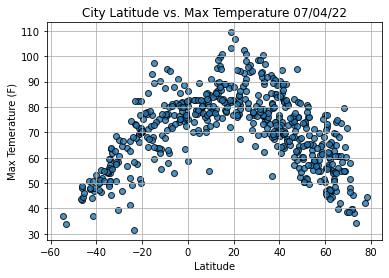

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temerature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

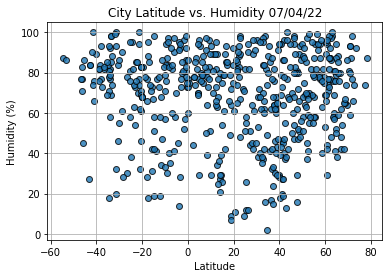

In [20]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

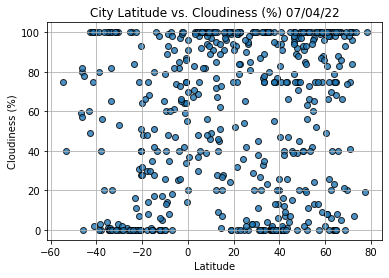

In [21]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

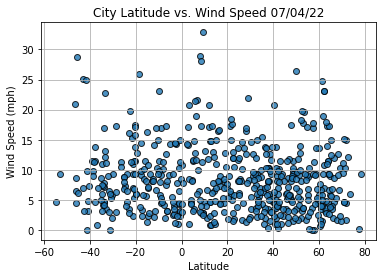

In [22]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemishere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                       Dingle
Country                        PH
Date          2022-07-04 16:52:37
Lat                       10.9995
Lng                      122.6711
Max Temp                    77.94
Humidity                       89
Cloudiness                     91
Wind Speed                    1.9
Name: 13, dtype: object

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

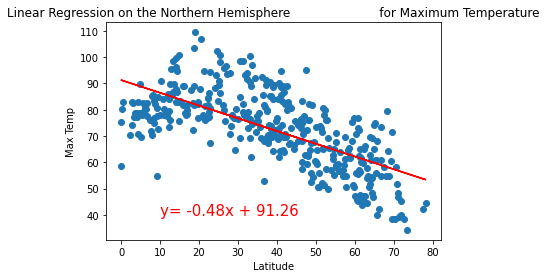

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Maximum Temperature', 'Max Temp',(10,40))

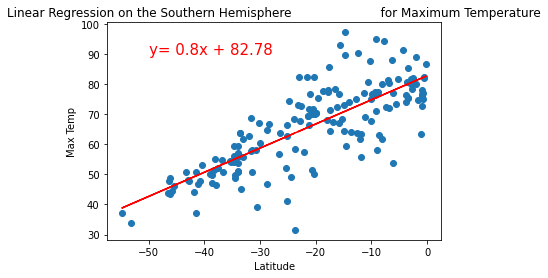

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Maximum Temperature', 'Max Temp',(-50,90))

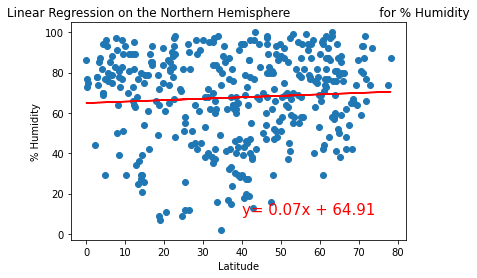

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Humidity', '% Humidity',(40,10))

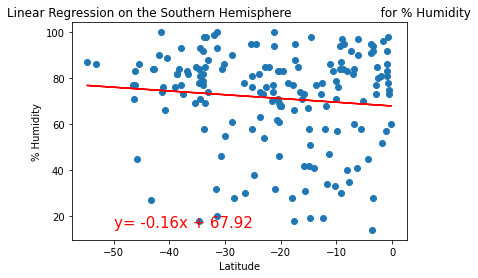

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for % Humidity', '% Humidity',(-50,15))

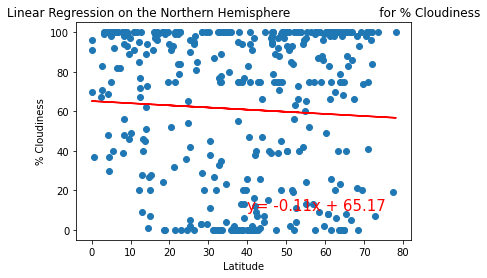

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Cloudiness', '% Cloudiness',(40,10))

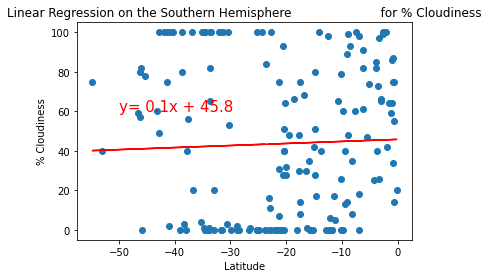

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for % Cloudiness', '% Cloudiness',(-50,60))

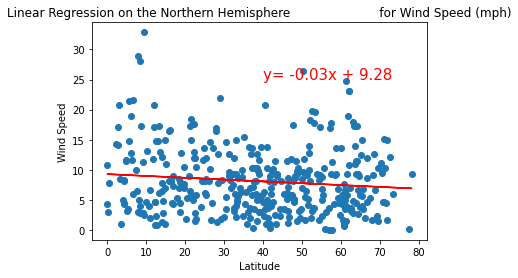

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Wind Speed (mph)', 'Wind Speed',(40,25))

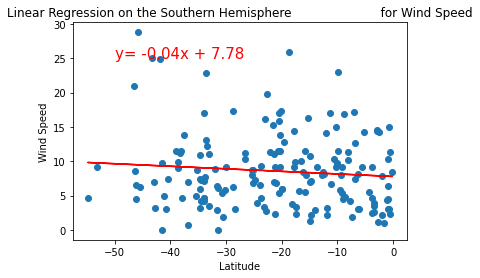

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Wind Speed', 'Wind Speed',(-50,25))